In [1]:
import os
import shutil
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np

# Config

In [2]:
#directory = '/data/project/general/aerosolretriev/aerosol_results_25_08_2022/forward_model/version4'
#directory = '/data/project/general/aerosolretriev/aerosol_results_august_2022/forward_model'
#directory = '/data/project/general/aerosolretriev/aerosol_results_25_08_2022/forward_model2'
#directory = '/data/project/general/aerosolretriev/aerosol_results_ds08/aerosol_results_11_09_2022/forward_model1'

directory = '/data/project/general/aerosolretriev/aerosol_results_december_2022/results_Romana/results_29_12_2022/forward_models_iv10_F11'

#directory = '/data/project/general/aerosolretriev/aerosol_results_september_2022/forward_model4'

#directory = '/data/project/general/aerosolretriev/aerosol_results_september_2022/forward_model_ASHA/forward_model3'

In [3]:

plot_dir = directory+'/plots'

if not os.path.exists(plot_dir):
    os.makedirs(plot_dir)

In [4]:
result_dir = directory 


In [5]:
model_dir =  directory + '/models'

if not os.path.exists(model_dir):
    os.makedirs(model_dir)

In [6]:
model_dir

'/data/project/general/aerosolretriev/aerosol_results_december_2022/results_Romana/results_29_12_2022/forward_models_iv10_F11/models'

# Load data

In [7]:
df = pd.read_csv(f'{result_dir}/results.csv', index_col=0)

In [8]:
config_columns = [col for col in df.columns if col.startswith('config/') if col.replace('config/', '') != 'datafile']
config_column_labels = {col: col.replace('config/', '') for col in config_columns if col != 'datafile'}

In [9]:
df['config/datafile'].loc[0]

'/data/project/general/aerosolretriev/aerosol_data/dataset_12_2022/preprocessed_new/data_all_train_iv10_F11.h5'

In [10]:
df.columns

Index(['MAE_train', 'MAE_val', 'MAPE_train', 'MAPE_val', 'MSE_train',
       'MSE_val', 'median_percentile_max_error_train',
       'median_percentile_max_error_val', '90_percentile_max_error_train',
       '90_percentile_max_error_val', 'r2_train', 'r2_val', 'r2_adj_train',
       'r2_adj_val', 'time_this_iter_s', 'done', 'timesteps_total',
       'episodes_total', 'training_iteration', 'experiment_id', 'date',
       'timestamp', 'time_total_s', 'pid', 'hostname', 'node_ip',
       'time_since_restore', 'timesteps_since_restore',
       'iterations_since_restore', 'trial_id', 'config/activation_function',
       'config/batch_size', 'config/datafile', 'config/depth', 'config/epochs',
       'config/learning_rate', 'config/loss', 'config/optimizer',
       'config/preprocessor_x', 'config/preprocessor_y',
       'config/training_repetitions', 'config/width', 'config/x_noise',
       'logdir'],
      dtype='object')

# Plot

## Generalisation of adjusted $R^2$

In [11]:
r2_val = 'r2_sklearn_val'
r2_train = 'r2_sklearn_train'

r2_val = 'r2_val'
r2_train = 'r2_train'

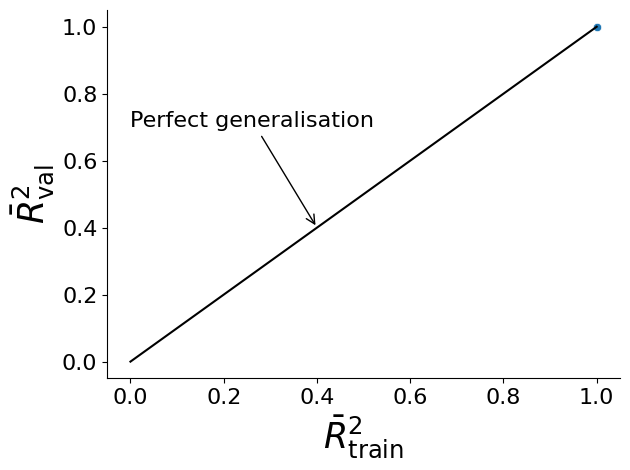

In [12]:
fig, ax = plt.subplots()

sns.scatterplot(data=df, x=r2_train, y=r2_val, ax=ax)
ax.plot([0., 1.], [0., 1.], color='black')
ax.annotate(xy=(0.4, 0.4),
            xytext=(0.0, 0.7),
            text='Perfect generalisation',
            fontsize=16,
            arrowprops={
                'arrowstyle': '->'
            })
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel(r'$\bar{R}^2_\mathrm{train}$', fontsize=25)
ax.set_ylabel(r'$\bar{R}^2_\mathrm{val}$', fontsize=25)
ax.tick_params(labelsize=16)

fig.tight_layout()
fig.savefig(f'{plot_dir}/R2_generalisation.jpg')

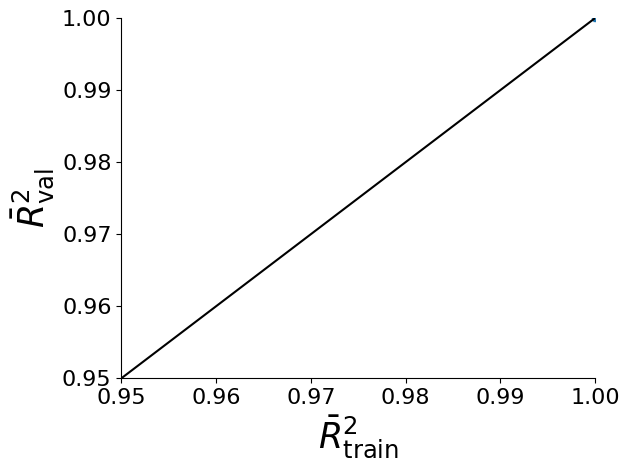

In [13]:
fig, ax = plt.subplots()

sns.scatterplot(data=df, x=r2_train, y=r2_val, ax=ax)
ax.plot([0.6, 1.], [0.6, 1.], color='black')
ax.annotate(xy=(0.4, 0.4),
            xytext=(0.0, 0.7),
            text='Perfect generalisation',
            fontsize=16,
            arrowprops={
                'arrowstyle': '->'
            })
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel(r'$\bar{R}^2_\mathrm{train}$', fontsize=25)
ax.set_ylabel(r'$\bar{R}^2_\mathrm{val}$', fontsize=25)
ax.tick_params(labelsize=16)
ax.set_xlim(0.95,1)
ax.set_ylim(0.95,1)
fig.tight_layout()
fig.savefig(f'{plot_dir}/R2_generalisation.jpg')

## Relationship between $R^2$ and rel. error

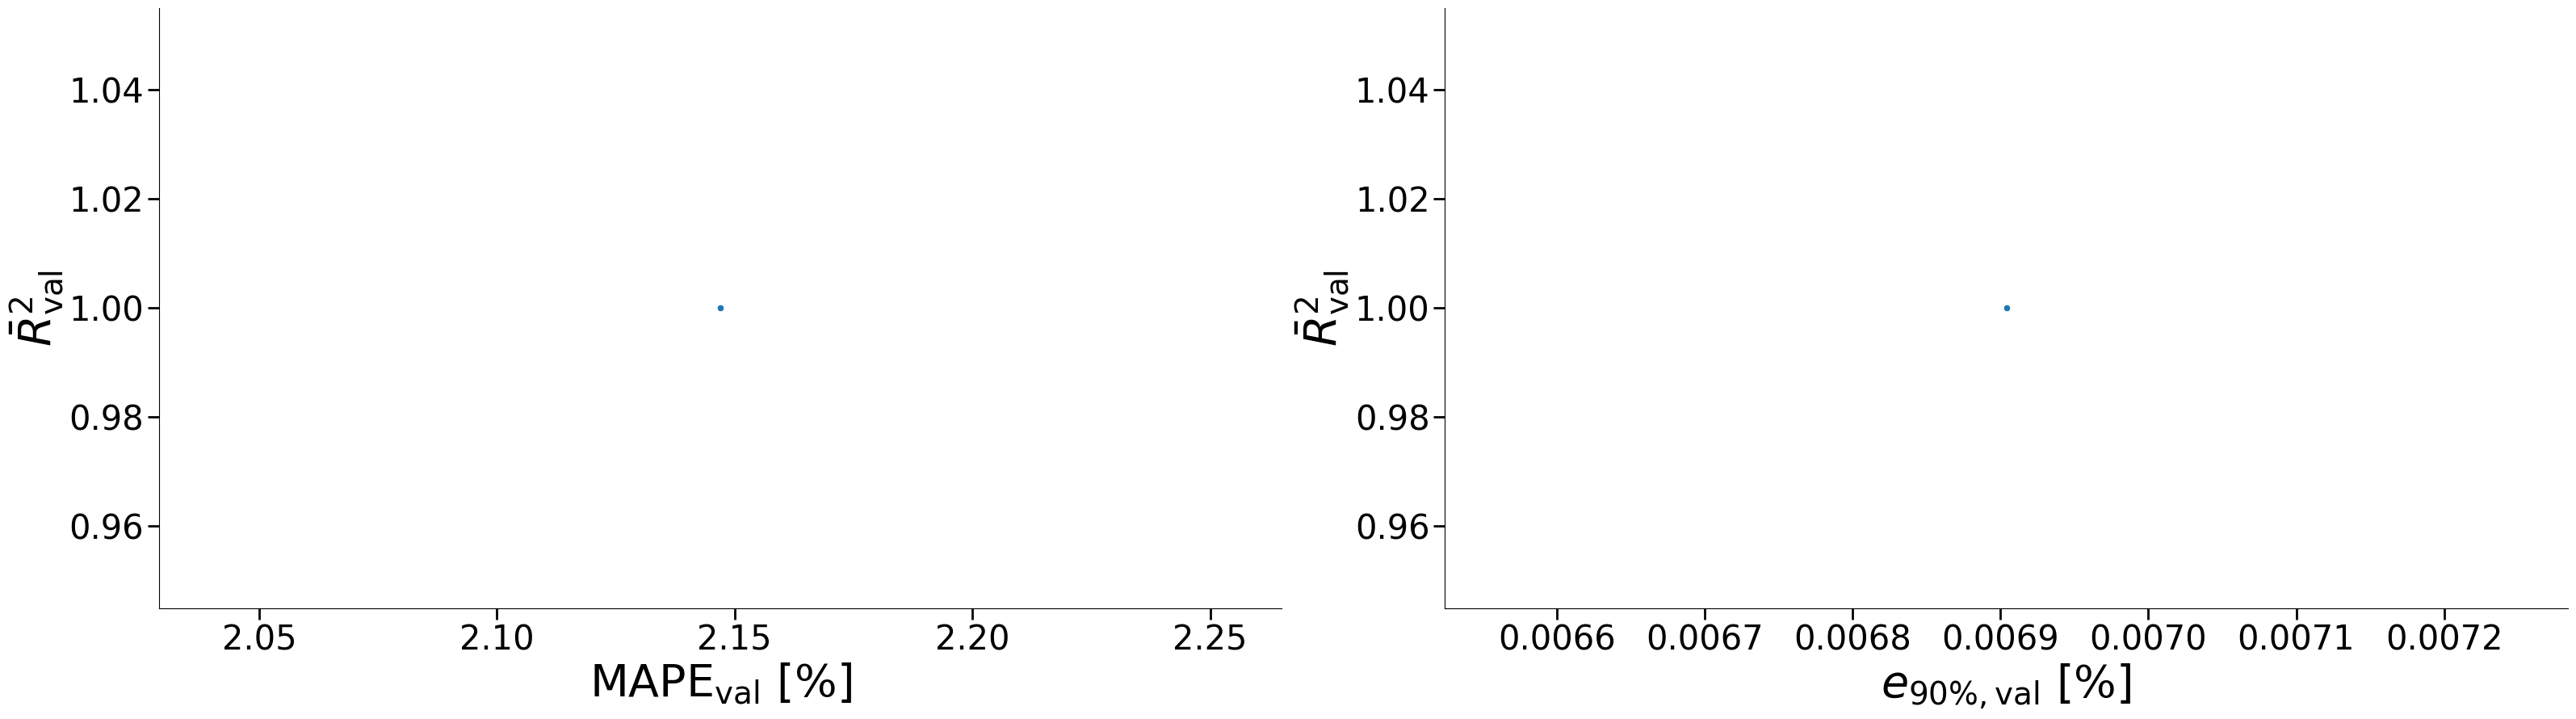

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(32, 9))

ax = axes[0]
#sns.scatterplot(data=df, x='MAPE_sklearn_val', y=r2_val, ax=ax)
sns.scatterplot(data=df, x='MAPE_val', y=r2_val, ax=ax)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel(r'$\mathrm{MAPE}_\mathrm{val}$ [%]', fontsize=40)
ax.set_ylabel(r'$\bar{R}^2_\mathrm{val}$', fontsize=40)

ax = axes[1]
#sns.scatterplot(data=df, x='MAE_sklearn_val', y=r2_val, ax=ax)
sns.scatterplot(data=df, x='MAE_val', y=r2_val, ax=ax)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel(r'$e_\mathrm{90\%, val}$ [%]', fontsize=40)
ax.set_ylabel(r'$\bar{R}^2_\mathrm{val}$', fontsize=40)

for ax in axes:
    ax.tick_params(labelsize=30, width=2, length=10)

fig.tight_layout()
fig.savefig(f'{plot_dir}/R2_vs_rel_errors.jpg')

## Execution time vs. batch size

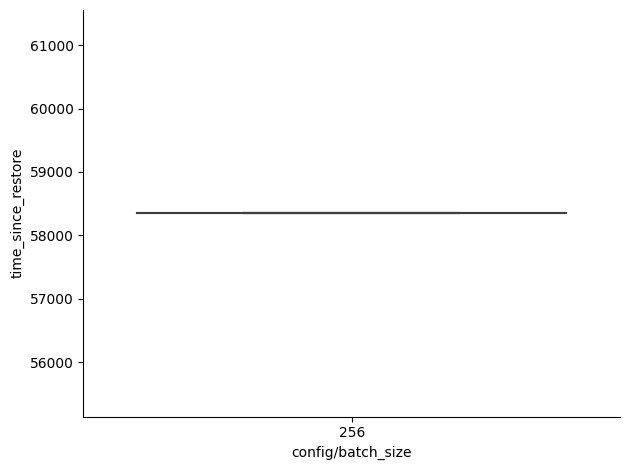

In [15]:
fig, ax = plt.subplots()

sns.boxplot(data=df, x='config/batch_size', y='time_since_restore', color=sns.color_palette()[0])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

fig.tight_layout()
fig.savefig(f'{plot_dir}/time_vs_batch_size')

## Dependence on the parameters

In [16]:
y_lim = [0.995, 1.005]
#y_lim = [0., 1.]

In [17]:
config_columns

['config/activation_function',
 'config/batch_size',
 'config/depth',
 'config/epochs',
 'config/learning_rate',
 'config/loss',
 'config/optimizer',
 'config/preprocessor_x',
 'config/preprocessor_y',
 'config/training_repetitions',
 'config/width',
 'config/x_noise']

In [18]:
to_plot = df[config_columns + [r2_val]].rename(columns=config_column_labels)

In [19]:
to_plot_ow =to_plot.copy()

In [20]:
to_plot_ow

activation_function  batch_size  depth  epochs  learning_rate loss  \
0                relu         256      4     100         0.0001  MSE   

                                           optimizer  \
0  <class 'tensorflow.python.keras.optimizer_v2.a...   

                                      preprocessor_x  \
0  <mllib.model.minmaxscaler.AdaptiveMinMaxScaler...   

                                      preprocessor_y  training_repetitions  \
0  <mllib.model.minmaxscaler.AdaptiveMinMaxScaler...                    50   

   width  x_noise    r2_val  
0    106    0.001  0.999979

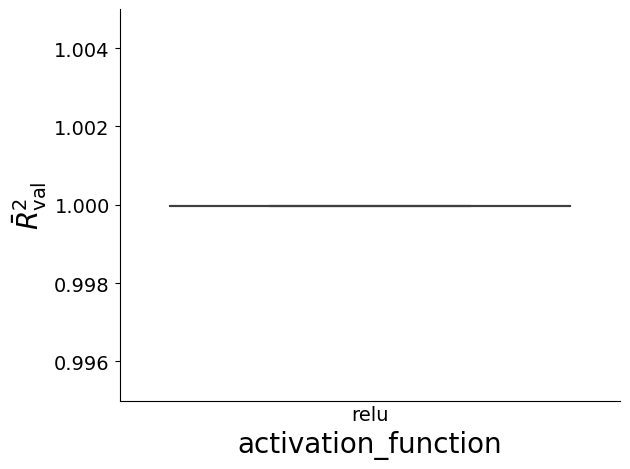

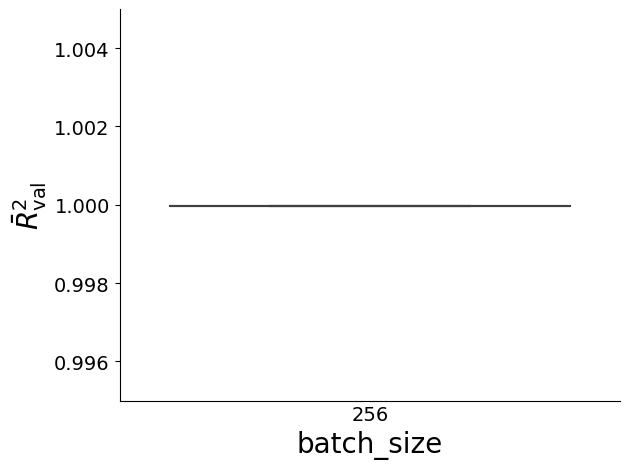

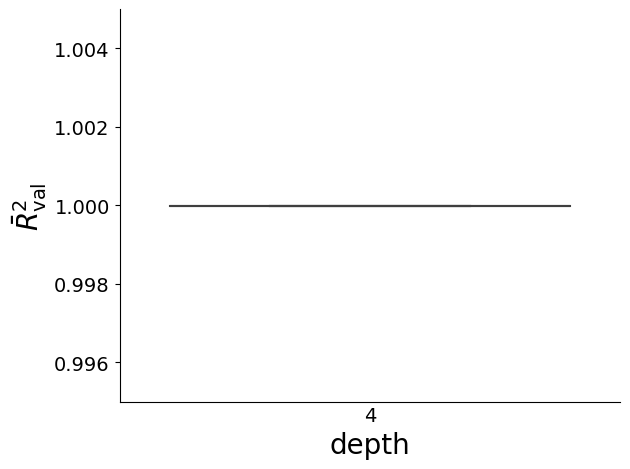

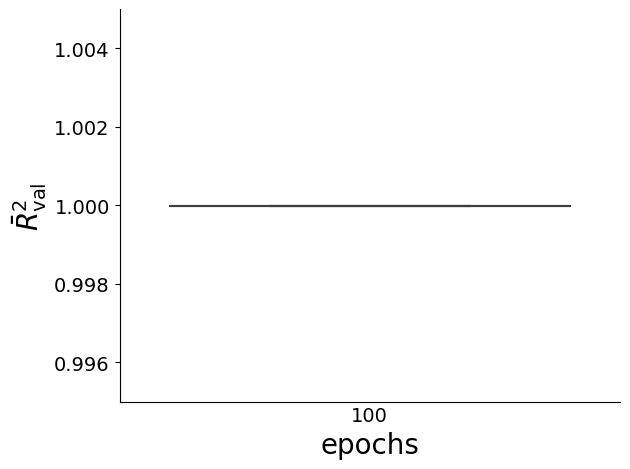

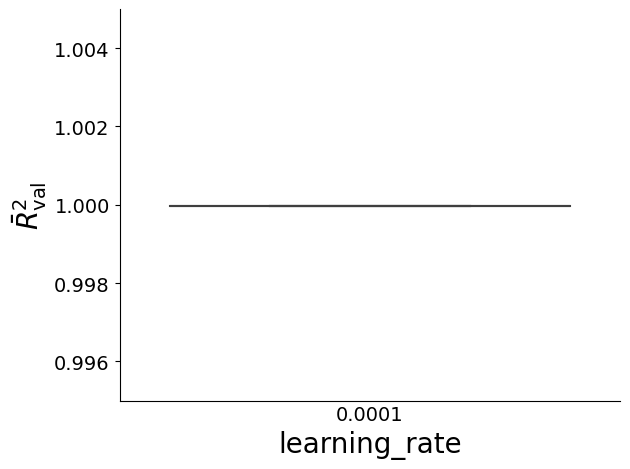

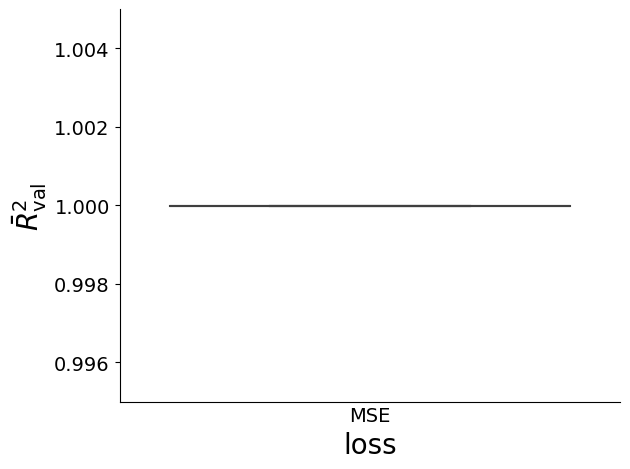

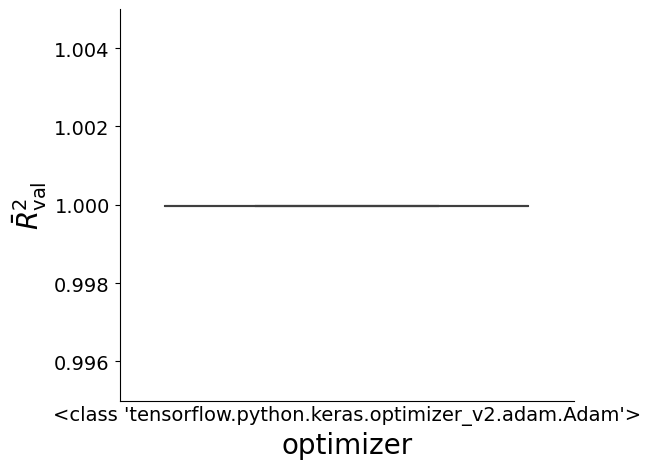

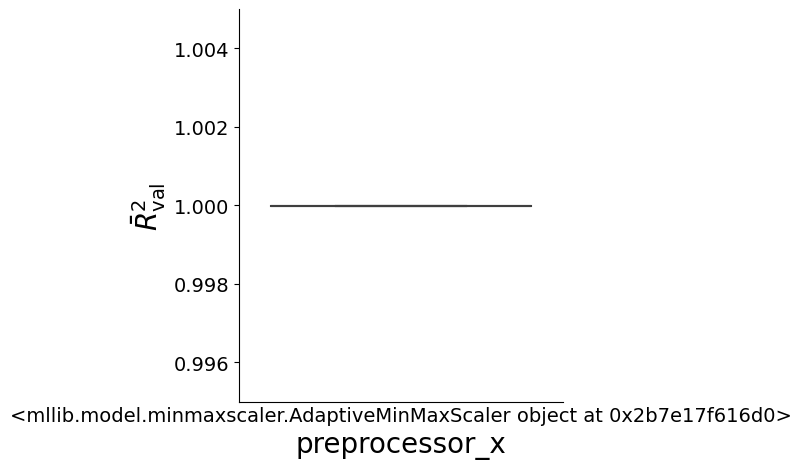

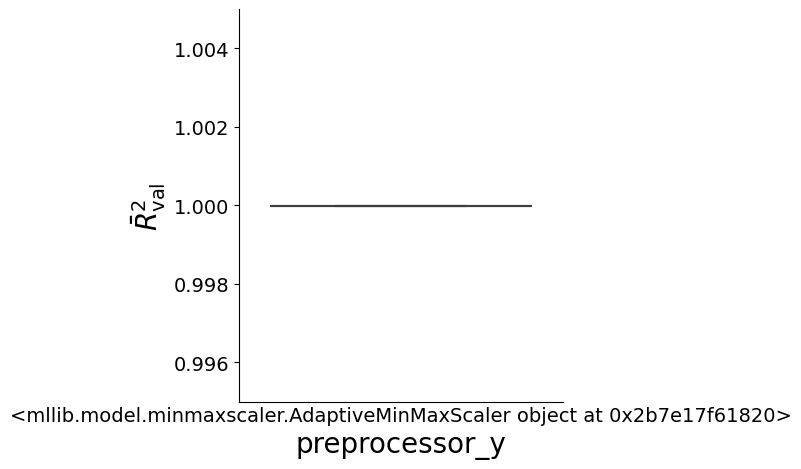

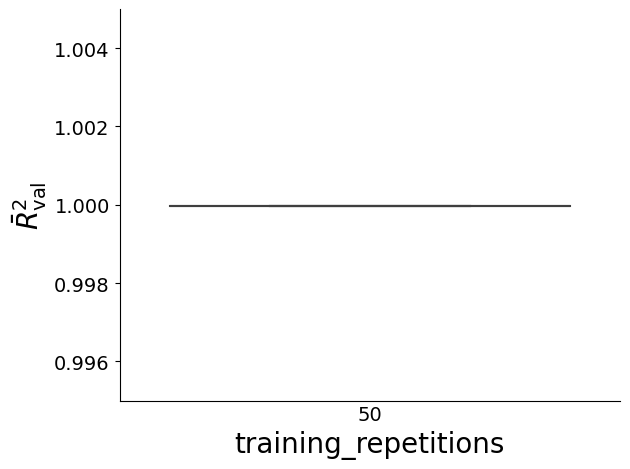

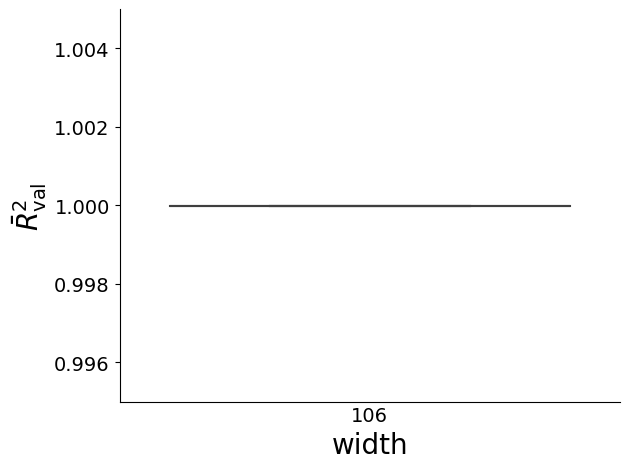

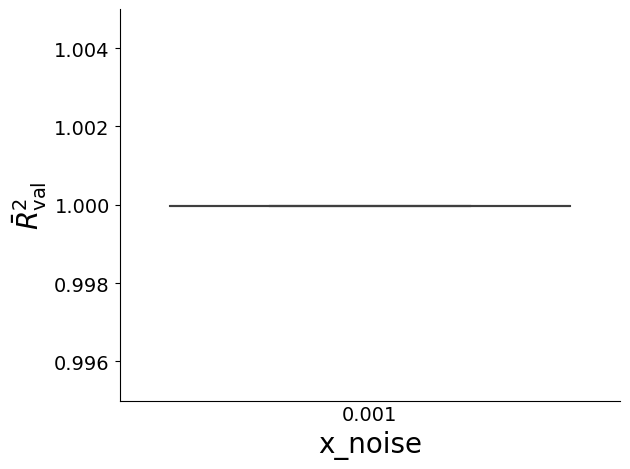

In [21]:
for param in to_plot.columns:
    if param == r2_val:
        continue

    fig, ax = plt.subplots()

    sns.boxplot(data=to_plot, x=param, y=r2_val, color=sns.color_palette()[0])

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_ylim(y_lim)
    ax.set_xlabel(ax.get_xlabel(), fontsize=20)
    ax.set_ylabel(r'$\bar{R}^2_\mathrm{val}$', fontsize=20)
    ax.tick_params(labelsize=14)
    ax.tick_params(axis='x', length=0)
    #ax.grid(True, axis='y')
    
    fig.tight_layout()
    fig.savefig(f'{plot_dir}/dependence_on_{param}.jpg')

In [22]:
config_columns

['config/activation_function',
 'config/batch_size',
 'config/depth',
 'config/epochs',
 'config/learning_rate',
 'config/loss',
 'config/optimizer',
 'config/preprocessor_x',
 'config/preprocessor_y',
 'config/training_repetitions',
 'config/width',
 'config/x_noise']

In [23]:
df[config_columns + [r2_val]]

config/activation_function  config/batch_size  config/depth  config/epochs  \
0                       relu                256             4            100   

   config/learning_rate config/loss  \
0                0.0001         MSE   

                                    config/optimizer  \
0  <class 'tensorflow.python.keras.optimizer_v2.a...   

                               config/preprocessor_x  \
0  <mllib.model.minmaxscaler.AdaptiveMinMaxScaler...   

                               config/preprocessor_y  \
0  <mllib.model.minmaxscaler.AdaptiveMinMaxScaler...   

   config/training_repetitions  config/width  config/x_noise    r2_val  
0                           50           106           0.001  0.999979

In [24]:
#g = sns.pairplot(data=df[config_columns + ['r2_adj_val']], hue='r2_adj_val', diag_kind='hist', corner=True)

In [25]:
len(config_columns)

12

In [26]:
len(config_column_labels)

12

In [27]:
to_plot = df[config_columns + [r2_val]].copy()
to_plot[r2_val], bins = pd.cut(df[r2_val], 5, retbins=True)
mean_points = [(bins[i] + bins[i-1]) / 2. for i in range(1, len(bins))]
to_plot[r2_val] = pd.cut(df[r2_val], 5, retbins=False, labels=mean_points)

In [28]:
to_plot[r2_val]


/data/user/boiger_r/python_env/aerosol_mieNN/lib/python3.9/site-packages/IPython/lib/pretty.py:778: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  output = repr(obj)


0    0.999979
Name: r2_val, dtype: category
Categories (5, float64): [0.999179 < 0.999579 < 0.999979 < 1.000379 < 1.000779]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


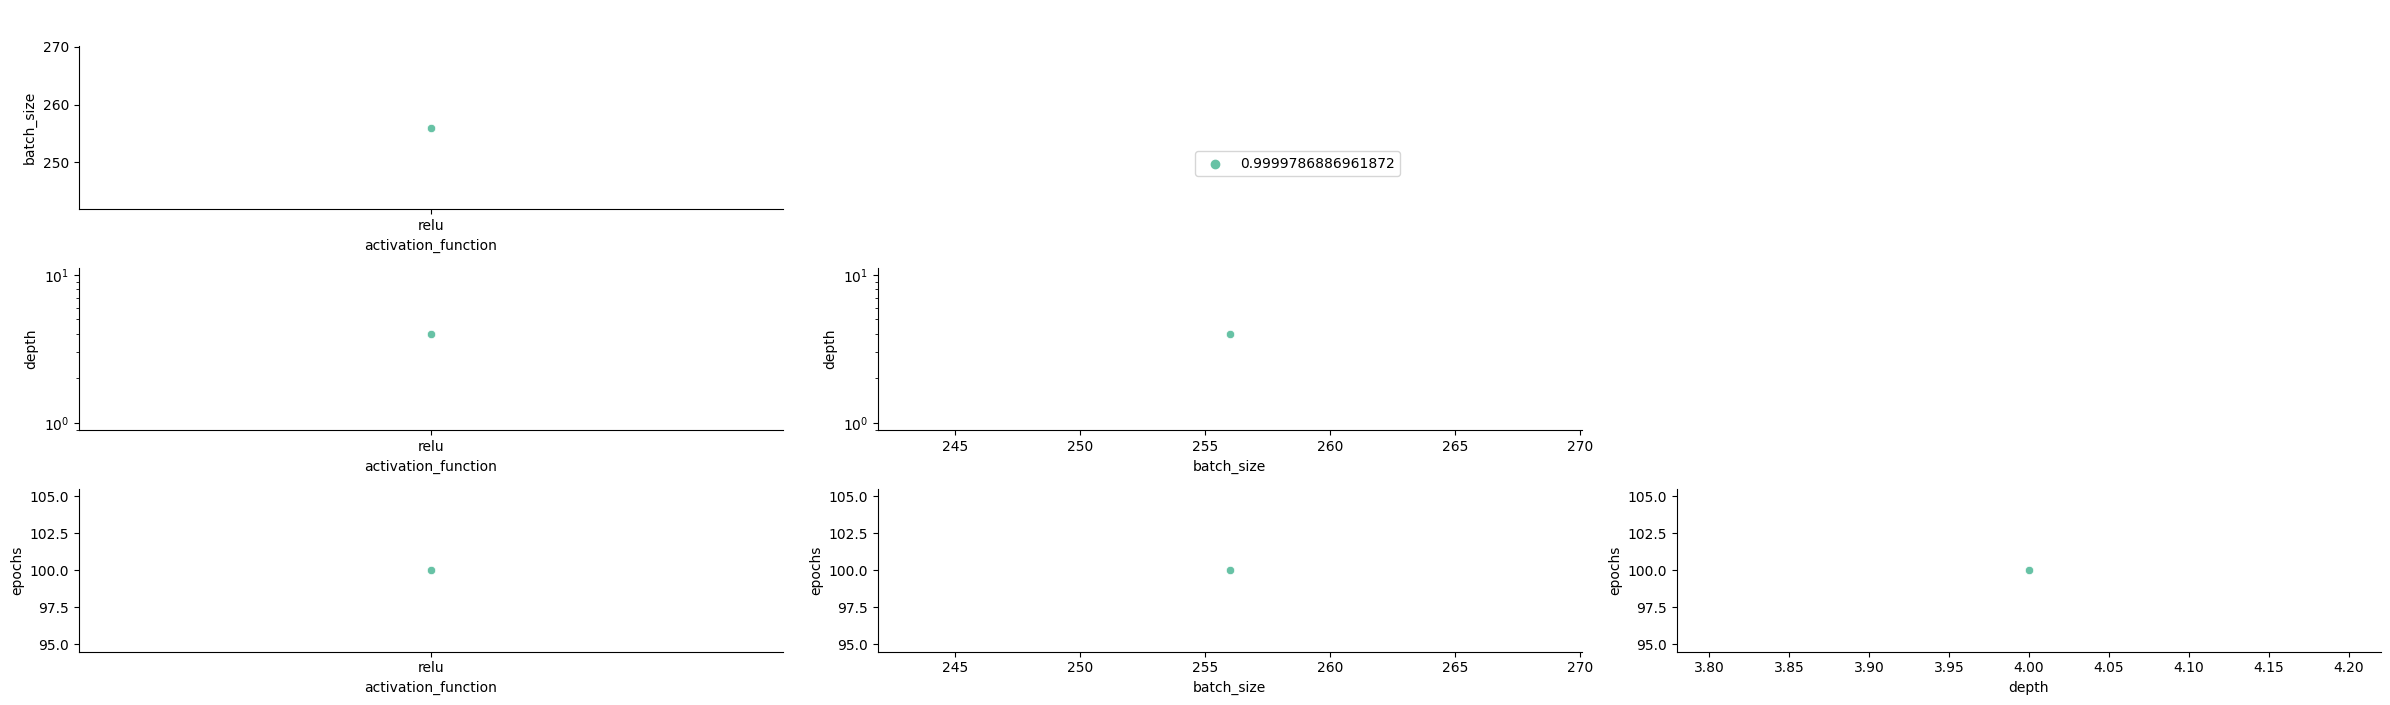

In [29]:
n_row = 4
n_col = 4
cols = config_columns

colors = sns.color_palette("BuGn_r", n_colors=len(to_plot[r2_val].unique()))
colors.reverse()

fig, axes = plt.subplots(n_row, n_col, figsize=(32, 9))
legend = True

for i in range(n_row):
    for j in range(n_col):
        ax = axes[i, j]
        if j >= i:
            ax.remove()
            continue
        sns.scatterplot(data=to_plot,
                        x=cols[j],
                        y=cols[i],
                        hue=to_plot[r2_val].tolist(),
                        palette=colors,
                        legend='brief' if legend else False,
                        ax=ax)
        if legend:
            legend = False

        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.set_xlabel(config_column_labels[config_columns[j]])
        ax.set_ylabel(config_column_labels[config_columns[i]])
        ax.legend().remove()
fig.tight_layout()
fig.legend(loc=(0.5, 0.75))

axes[2, 0].set_yscale('log')
axes[2, 1].set_yscale('log')

# Best configs

In [30]:
best_config = df.sort_values(r2_val, ascending=False).iloc[0, :]

In [31]:
df.sort_values(r2_val, ascending=False)[config_columns + [r2_val,r2_train]].rename(columns=config_column_labels).head(20)#,'r2_adj_val', 'MAPE_val', 'median_percentile_max_error_val', '90_percentile_max_error_val','r2_val']].rename(columns=config_column_labels).head(20)

activation_function  batch_size  depth  epochs  learning_rate loss  \
0                relu         256      4     100         0.0001  MSE   

                                           optimizer  \
0  <class 'tensorflow.python.keras.optimizer_v2.a...   

                                      preprocessor_x  \
0  <mllib.model.minmaxscaler.AdaptiveMinMaxScaler...   

                                      preprocessor_y  training_repetitions  \
0  <mllib.model.minmaxscaler.AdaptiveMinMaxScaler...                    50   

   width  x_noise    r2_val  r2_train  
0    106    0.001  0.999979  0.999981

In [32]:
best_config.name

0

In [33]:
best_config['trial_id']

'605d1_00000'

# Worst configs

In [34]:
df.sort_values(r2_val, ascending=True)[config_columns + [r2_val, r2_train]].rename(columns=config_column_labels).head(5)# ['r2_adj_val', 'MAPE_val', 'median_percentile_max_error_val', '90_percentile_max_error_val']].rename(columns=config_column_labels).head(5)

activation_function  batch_size  depth  epochs  learning_rate loss  \
0                relu         256      4     100         0.0001  MSE   

                                           optimizer  \
0  <class 'tensorflow.python.keras.optimizer_v2.a...   

                                      preprocessor_x  \
0  <mllib.model.minmaxscaler.AdaptiveMinMaxScaler...   

                                      preprocessor_y  training_repetitions  \
0  <mllib.model.minmaxscaler.AdaptiveMinMaxScaler...                    50   

   width  x_noise    r2_val  r2_train  
0    106    0.001  0.999979  0.999981

In [35]:
df

MAE_train   MAE_val  MAPE_train  MAPE_val  MSE_train   MSE_val  \
0   0.006842  0.006904    4.678729  2.147004   0.000157  0.000176   

   median_percentile_max_error_train  median_percentile_max_error_val  \
0                           1.522775                         1.500201   

   90_percentile_max_error_train  90_percentile_max_error_val  ...  \
0                     109.338534                   108.168851  ...   

   config/epochs  config/learning_rate  config/loss  \
0            100                0.0001          MSE   

                                    config/optimizer  \
0  <class 'tensorflow.python.keras.optimizer_v2.a...   

                               config/preprocessor_x  \
0  <mllib.model.minmaxscaler.AdaptiveMinMaxScaler...   

                               config/preprocessor_y  \
0  <mllib.model.minmaxscaler.AdaptiveMinMaxScaler...   

   config/training_repetitions  config/width  config/x_noise  \
0                           50           106           0.001   

                                              logdir  
0  /data/project/general/aerosolretriev/aerosol_r...  

[1 rows x 44 columns]

# Copy the best model to the models directory

In [36]:
best_model_dir = f'{best_config["logdir"]}/surrogate_model'
best_model_dir = f'{best_config["logdir"]}'

In [37]:
model_dir

'/data/project/general/aerosolretriev/aerosol_results_december_2022/results_Romana/results_29_12_2022/forward_models_iv10_F11/models'

In [38]:
shutil.copytree(best_model_dir, f'{model_dir}/forward_model')

'/data/project/general/aerosolretriev/aerosol_results_december_2022/results_Romana/results_29_12_2022/forward_models_iv10_F11/models/forward_model'

In [39]:
model_dir

'/data/project/general/aerosolretriev/aerosol_results_december_2022/results_Romana/results_29_12_2022/forward_models_iv10_F11/models'

# Closer look w. r. t. overfitting

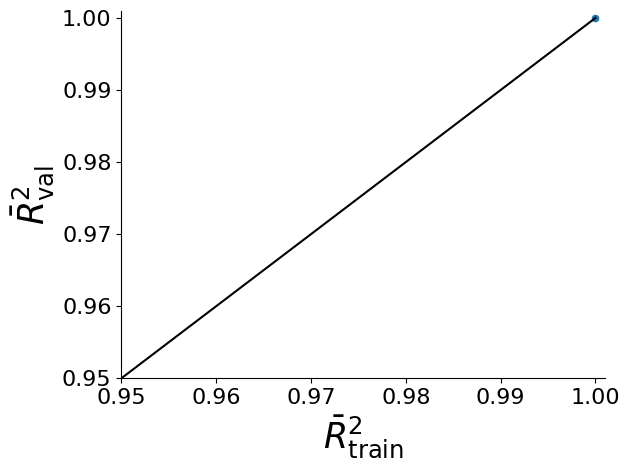

In [40]:
fig, ax = plt.subplots()

sns.scatterplot(data=df, x=r2_train, y=r2_val, ax=ax)
ax.plot([0., 1.], [0., 1.], color='black')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel(r'$\bar{R}^2_\mathrm{train}$', fontsize=25)
ax.set_ylabel(r'$\bar{R}^2_\mathrm{val}$', fontsize=25)
ax.tick_params(labelsize=16)
ax.set_xlim([0.95, 1.001])
ax.set_ylim([0.95, 1.001])

fig.tight_layout()
fig.savefig(f'{plot_dir}/R2_generalisation.jpg')

In [41]:
df[df[r2_train] > 0.95]

MAE_train   MAE_val  MAPE_train  MAPE_val  MSE_train   MSE_val  \
0   0.006842  0.006904    4.678729  2.147004   0.000157  0.000176   

   median_percentile_max_error_train  median_percentile_max_error_val  \
0                           1.522775                         1.500201   

   90_percentile_max_error_train  90_percentile_max_error_val  ...  \
0                     109.338534                   108.168851  ...   

   config/epochs  config/learning_rate  config/loss  \
0            100                0.0001          MSE   

                                    config/optimizer  \
0  <class 'tensorflow.python.keras.optimizer_v2.a...   

                               config/preprocessor_x  \
0  <mllib.model.minmaxscaler.AdaptiveMinMaxScaler...   

                               config/preprocessor_y  \
0  <mllib.model.minmaxscaler.AdaptiveMinMaxScaler...   

   config/training_repetitions  config/width  config/x_noise  \
0                           50           106           0.001   

                                              logdir  
0  /data/project/general/aerosolretriev/aerosol_r...  

[1 rows x 44 columns]

In [42]:
# LOad history of best config

In [43]:
best_model_folder = best_config['trial_id']

In [44]:
result_dir

'/data/project/general/aerosolretriev/aerosol_results_december_2022/results_Romana/results_29_12_2022/forward_models_iv10_F11'

In [45]:
best_model_hist = pd.read_csv(f'{result_dir}/histories/{best_model_folder}.csv', index_col=0)

In [46]:
best_model_hist

MAE_train   MAE_val  MAPE_train  MAPE_val  MSE_train   MSE_val  \
0    0.025293  0.025273   19.027757  8.288212   0.001859  0.001882   
1    0.018866  0.018894   19.711383  6.226466   0.001198  0.001220   
2    0.018401  0.018451   13.266574  6.202434   0.001024  0.001050   
3    0.018180  0.018239    9.474615  6.147192   0.000914  0.000939   
4    0.014982  0.015045   11.495271  4.969764   0.000744  0.000774   
5    0.014684  0.014728   12.974564  4.911018   0.000689  0.000717   
6    0.012935  0.012978   10.370936  4.059959   0.000601  0.000629   
7    0.012476  0.012542    9.948998  3.932101   0.000548  0.000577   
8    0.012326  0.012388   12.883727  3.928720   0.000515  0.000541   
9    0.012428  0.012464   17.613889  4.159566   0.000474  0.000497   
10   0.011432  0.011484   11.564585  3.601937   0.000425  0.000447   
11   0.010761  0.010819   10.850067  3.400698   0.000384  0.000406   
12   0.011317  0.011378    9.343523  3.664461   0.000377  0.000399   
13   0.012224  0.012283   13.661115  4.211840   0.000389  0.000410   
14   0.010812  0.010874    8.098572  3.348616   0.000340  0.000360   
15   0.009637  0.009694    9.027248  3.278972   0.000308  0.000327   
16   0.009381  0.009442   10.263418  3.135891   0.000296  0.000315   
17   0.010956  0.011021    8.150964  3.552969   0.000321  0.000341   
18   0.009351  0.009406    6.144571  3.057476   0.000281  0.000300   
19   0.014062  0.014137   10.766980  4.823845   0.000397  0.000417   
20   0.009416  0.009474    4.771152  3.186627   0.000275  0.000294   
21   0.013236  0.013306    9.026700  4.305242   0.000372  0.000391   
22   0.008585  0.008652    3.457483  2.909694   0.000242  0.000261   
23   0.009368  0.009432    3.508529  3.232829   0.000253  0.000271   
24   0.009907  0.009967    6.071326  3.179692   0.000276  0.000293   
25   0.008092  0.008159    4.109158  2.439152   0.000220  0.000238   
26   0.008153  0.008212    3.755666  2.649200   0.000224  0.000242   
27   0.008070  0.008129    3.718892  2.503636   0.000214  0.000231   
28   0.011915  0.011972    7.003000  3.568601   0.000304  0.000321   
29   0.008528  0.008593    4.577561  3.000760   0.000216  0.000234   
30   0.007513  0.007586    4.877074  2.396605   0.000194  0.000211   
31   0.009298  0.009354    6.784023  2.780264   0.000230  0.000247   
32   0.009595  0.009663    6.195277  3.437643   0.000231  0.000248   
33   0.008735  0.008787    4.958289  2.753297   0.000212  0.000228   
34   0.007568  0.007623    5.061558  2.575560   0.000186  0.000202   
35   0.007488  0.007558    3.326808  2.537823   0.000186  0.000202   
36   0.009892  0.009937    7.390244  3.195665   0.000227  0.000244   
37   0.009121  0.009172    6.368439  3.007425   0.000212  0.000228   
38   0.007616  0.007679    5.658565  2.600966   0.000182  0.000199   
39   0.010750  0.010808    7.723036  3.090952   0.000250  0.000266   
40   0.007588  0.007663    3.744523  2.603444   0.000181  0.000198   
41   0.007543  0.007596    5.703710  2.312587   0.000184  0.000200   
42   0.008776  0.008840    5.900007  2.732918   0.000199  0.000216   
43   0.008478  0.008532    4.571781  2.575885   0.000190  0.000207   
44   0.007537  0.007613    5.096488  2.519131   0.000174  0.000191   
45   0.008643  0.008700    3.920246  2.531253   0.000196  0.000214   
46   0.006533  0.006599    2.925167  2.177199   0.000153  0.000171   
47   0.006845  0.006912    3.881186  2.325516   0.000157  0.000174   
48   0.006728  0.006797    4.089267  2.271395   0.000156  0.000174   
49   0.006842  0.006904    4.678729  2.147004   0.000157  0.000176   

    median_percentile_max_error_train  median_percentile_max_error_val  \
0                            5.816042                         5.718634   
1                            4.649275                         4.561264   
2                            4.238438                         4.167765   
3                            4.159027                         4.117133   
4                            3.662277                         3

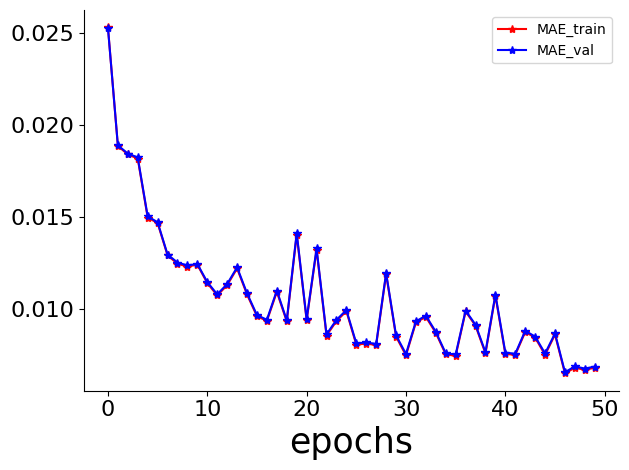

In [47]:
fig, ax = plt.subplots()

ax.plot(best_model_hist['MAE_train'],'r*-', label = 'MAE_train')
ax.plot(best_model_hist['MAE_val'],'b*-',label =  'MAE_val')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel('epochs', fontsize=25)
ax.tick_params(labelsize=16)
ax.legend()
fig.tight_layout()


In [48]:
best_model_hist.keys()

Index(['MAE_train', 'MAE_val', 'MAPE_train', 'MAPE_val', 'MSE_train',
       'MSE_val', 'median_percentile_max_error_train',
       'median_percentile_max_error_val', '90_percentile_max_error_train',
       '90_percentile_max_error_val', 'r2_train', 'r2_val', 'r2_adj_train',
       'r2_adj_val', 'time_this_iter_s', 'done', 'timesteps_total',
       'episodes_total', 'training_iteration', 'experiment_id', 'date',
       'timestamp', 'time_total_s', 'pid', 'hostname', 'node_ip',
       'time_since_restore', 'timesteps_since_restore',
       'iterations_since_restore', 'trial_id'],
      dtype='object')

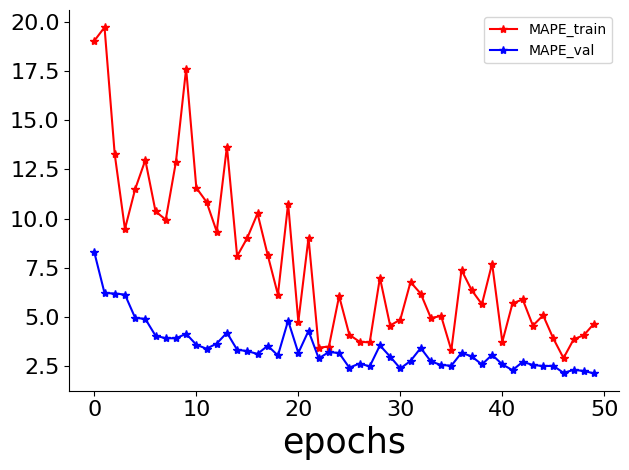

In [49]:
fig, ax = plt.subplots()

ax.plot(best_model_hist['MAPE_train'],'r*-', label = 'MAPE_train')
ax.plot(best_model_hist['MAPE_val'],'b*-',label =  'MAPE_val')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel('epochs', fontsize=25)
ax.tick_params(labelsize=16)
ax.legend()
fig.tight_layout()

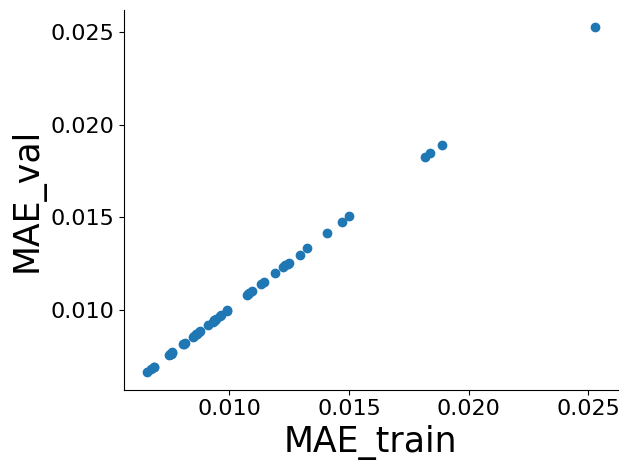

In [50]:
fig, ax = plt.subplots()


ax.scatter(best_model_hist['MAE_train'],best_model_hist['MAE_val'])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel('MAE_train', fontsize=25)
ax.set_ylabel('MAE_val', fontsize=25)

ax.tick_params(labelsize=16)
fig.tight_layout()
fig.savefig(f'{plot_dir}/R2_generalisation.jpg')

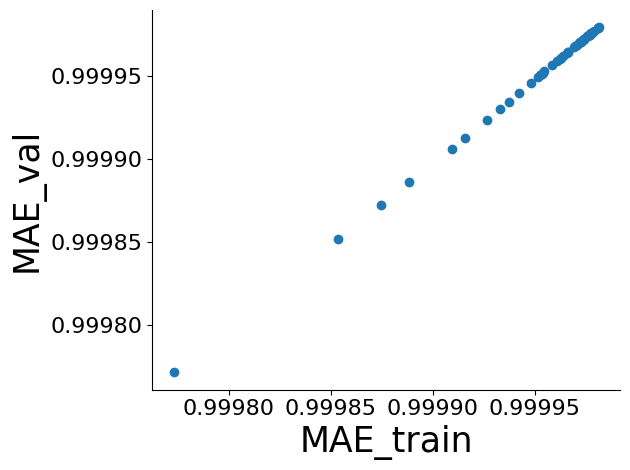

In [51]:
fig, ax = plt.subplots()


ax.scatter(best_model_hist['r2_train'],best_model_hist['r2_val'])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel('MAE_train', fontsize=25)
ax.set_ylabel('MAE_val', fontsize=25)

ax.tick_params(labelsize=16)
fig.tight_layout()
fig.savefig(f'{plot_dir}/R2_generalisation.jpg')

In [52]:
to_plot

config/activation_function  config/batch_size  config/depth  config/epochs  \
0                       relu                256             4            100   

   config/learning_rate config/loss  \
0                0.0001         MSE   

                                    config/optimizer  \
0  <class 'tensorflow.python.keras.optimizer_v2.a...   

                               config/preprocessor_x  \
0  <mllib.model.minmaxscaler.AdaptiveMinMaxScaler...   

                               config/preprocessor_y  \
0  <mllib.model.minmaxscaler.AdaptiveMinMaxScaler...   

   config/training_repetitions  config/width  config/x_noise    r2_val  
0                           50           106           0.001  0.999979

In [53]:
to_plot_ow.columns

Index(['activation_function', 'batch_size', 'depth', 'epochs', 'learning_rate',
       'loss', 'optimizer', 'preprocessor_x', 'preprocessor_y',
       'training_repetitions', 'width', 'x_noise', 'r2_val'],
      dtype='object')

In [54]:
model_dir

'/data/project/general/aerosolretriev/aerosol_results_december_2022/results_Romana/results_29_12_2022/forward_models_iv10_F11/models'

# create overview plot

In [55]:
best_config['config/datafile']

'/data/project/general/aerosolretriev/aerosol_data/dataset_12_2022/preprocessed_new/data_all_train_iv10_F11.h5'

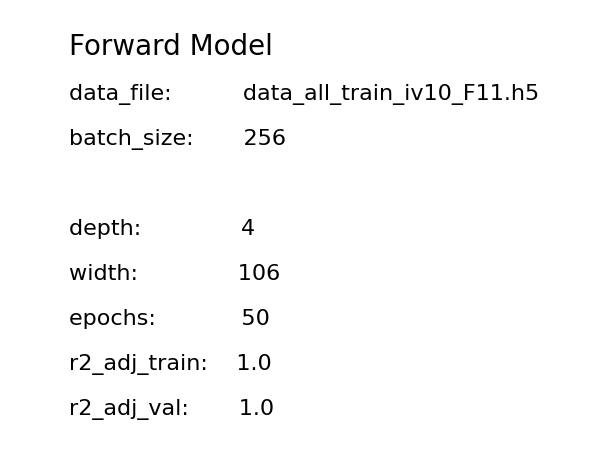

In [56]:
fig, ax = plt.subplots()

ax.annotate(xy=(1, 1),xytext=(0.1, 0.9),text='Forward Model',fontsize=20)
ax.annotate(xy=(1, 1),xytext=(0.1, 0.8),text='data_file:          ' +os.path.basename(best_config['config/datafile']),fontsize=16)
ax.annotate(xy=(1, 1),xytext=(0.1, 0.7),text='batch_size:       ' +str(best_config['config/batch_size']),fontsize=16)
#ax.annotate(xy=(1, 1),xytext=(0.1, 0.6),text='learning_rate:  '+str(best_config['config/lr']),fontsize=16)
ax.annotate(xy=(1, 1),xytext=(0.1, 0.5),text='depth:              '+str(best_config['config/depth']),fontsize=16)
ax.annotate(xy=(1, 1),xytext=(0.1, 0.4),text='width:              '+str(best_config['config/width']),fontsize=16)
ax.annotate(xy=(1, 1),xytext=(0.1, 0.3),text='epochs:            '+str(best_config['iterations_since_restore']),fontsize=16)
ax.annotate(xy=(1, 1),xytext=(0.1, 0.2),text='r2_adj_train:    '+str(np.round(best_config['r2_adj_train'],3)),fontsize=16)
ax.annotate(xy=(1, 1),xytext=(0.1, 0.1),text='r2_adj_val:       '+str(np.round(best_config['r2_adj_val'],3)),fontsize=16)


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)

fig.tight_layout()
fig.savefig(f'{plot_dir}/forward_model_description.jpg',bbox_inches='tight')

1 0
1 1
1 2
2 0


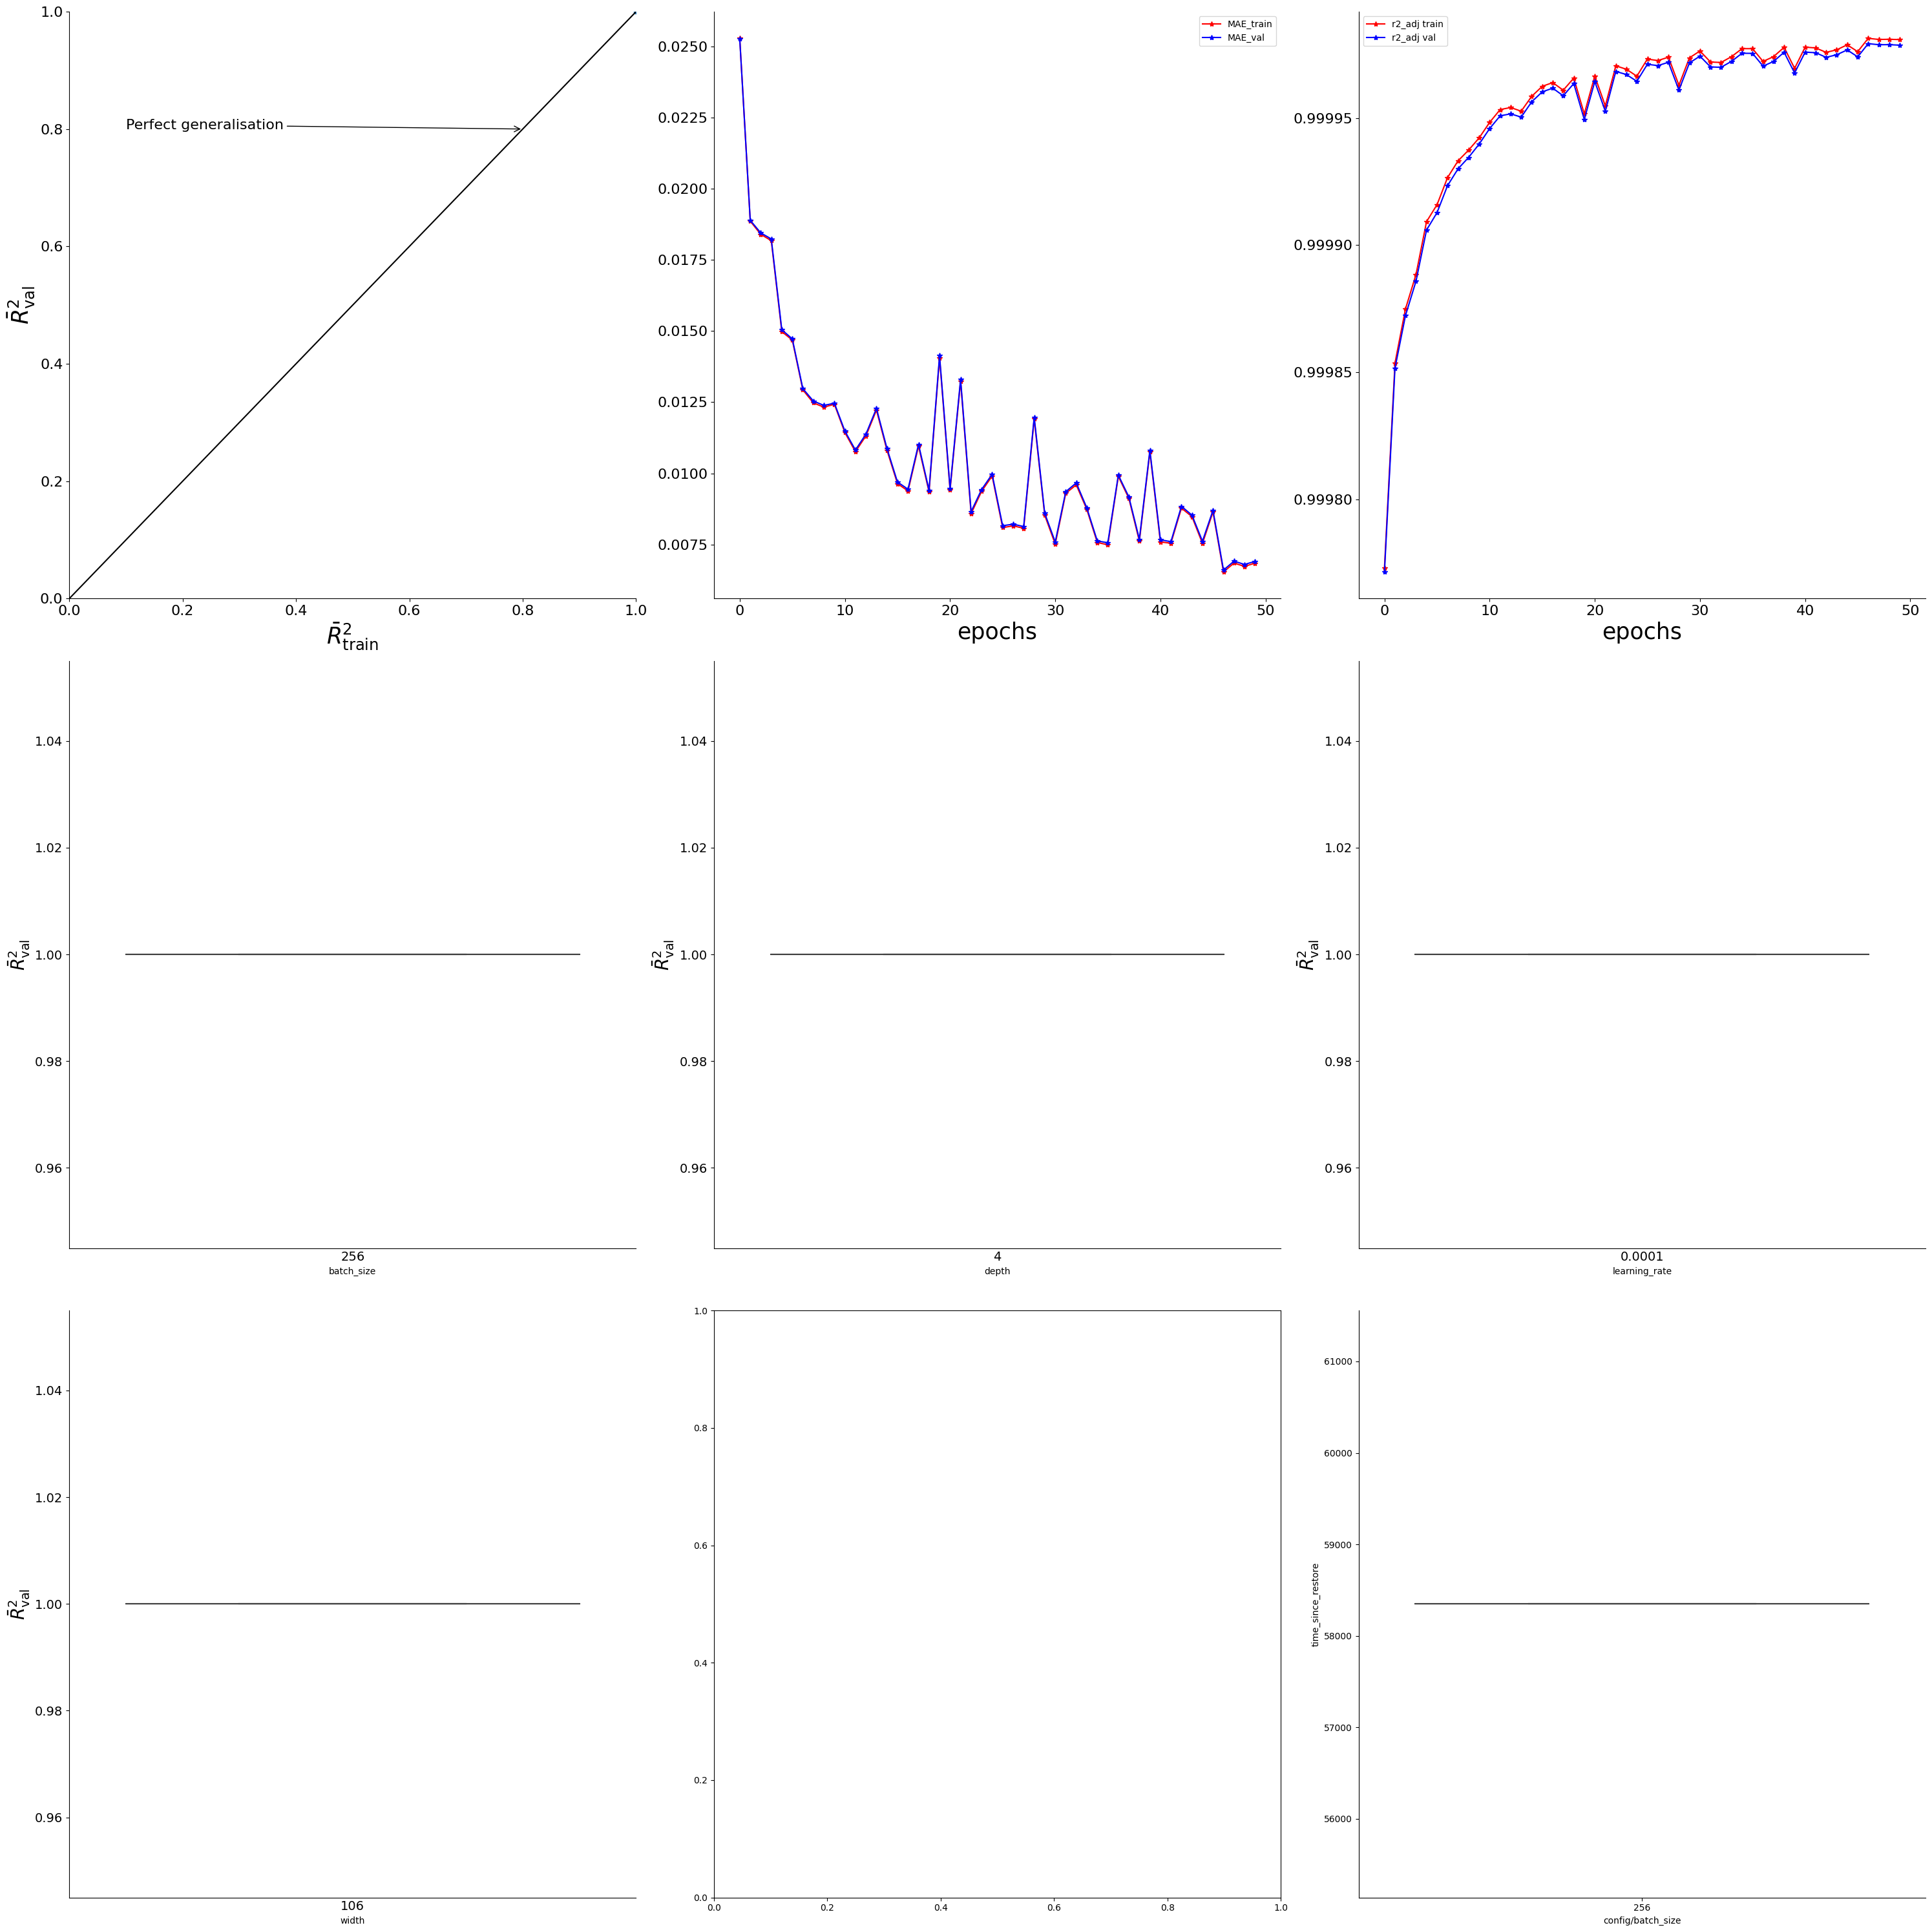

In [57]:
fig, axes = plt.subplots(3, 3, figsize=(30, 30))

ax= axes[0,0]
sns.scatterplot(data=df, x='r2_train', y='r2_val', ax=ax)
ax.plot([-1.5, 1.], [-1.5, 1.], color='black')
ax.annotate(xy=(0.8, 0.8),
            xytext=(0.1, 0.8),
            text='Perfect generalisation',
            fontsize=16,
            arrowprops={
                'arrowstyle': '->'
            })
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel(r'$\bar{R}^2_\mathrm{train}$', fontsize=25)
ax.set_ylabel(r'$\bar{R}^2_\mathrm{val}$', fontsize=25)
ax.tick_params(labelsize=16)
ax.set_xlim([0, 1.])
ax.set_ylim([0, 1.])


ax = axes[0,1]
ax.plot(best_model_hist['MAE_train'],'r*-', label = 'MAE_train')
ax.plot(best_model_hist['MAE_val'],'b*-',label =  'MAE_val')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel('epochs', fontsize=25)
ax.tick_params(labelsize=16)
ax.legend()

ax = axes[0,2]

ax.plot(best_model_hist['r2_adj_train'],'r*-', label = 'r2_adj train')
ax.plot(best_model_hist['r2_adj_val'],'b*-',label =  'r2_adj val')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel('epochs', fontsize=25)
ax.tick_params(labelsize=16)
ax.legend()


axeslist= [[1,0],[1,1],[1,2],[2,0],[2,1]]
i = 0

plot_columns_list = ['batch_size', 'depth', 'learning_rate', 'width']

for param in plot_columns_list:
    if param == 'r2_val':
        continue
    ax = axes[axeslist[i][0],axeslist[i][1]]
    print(axeslist[i][0],axeslist[i][1])
    i = i+1
    sns.boxplot(x=param, y='r2_val',data=to_plot_ow, color=sns.color_palette()[0],ax=ax)

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
 #   ax.set_ylim([0,1])
 #   ax.set_xlabel(ax.get_xlabel(), fontsize=20)
    ax.set_ylabel(r'$\bar{R}^2_\mathrm{val}$', fontsize=20)
    ax.tick_params(labelsize=14)
    ax.tick_params(axis='x', length=0)



ax = axes[2,2]

sns.boxplot(data=df, x='config/batch_size', y='time_since_restore', color=sns.color_palette()[0],ax=ax)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

fig.tight_layout()


fig.savefig(f'{plot_dir}/hyperparameter_scan_overview.jpg',bbox_inches='tight')

# Save configurations of best model

In [58]:
best_config_df = pd.DataFrame(best_config)

In [59]:
best_config_df = best_config_df.T
best_config_df

MAE_train   MAE_val MAPE_train  MAPE_val MSE_train   MSE_val  \
0  0.006842  0.006904   4.678729  2.147004  0.000157  0.000176   

  median_percentile_max_error_train median_percentile_max_error_val  \
0                          1.522775                        1.500201   

  90_percentile_max_error_train 90_percentile_max_error_val  ...  \
0                    109.338534                  108.168851  ...   

  config/epochs config/learning_rate config/loss  \
0           100               0.0001         MSE   

                                    config/optimizer  \
0  <class 'tensorflow.python.keras.optimizer_v2.a...   

                               config/preprocessor_x  \
0  <mllib.model.minmaxscaler.AdaptiveMinMaxScaler...   

                               config/preprocessor_y  \
0  <mllib.model.minmaxscaler.AdaptiveMinMaxScaler...   

  config/training_repetitions config/width config/x_noise  \
0                          50          106          0.001   

                                              logdir  
0  /data/project/general/aerosolretriev/aerosol_r...  

[1 rows x 44 columns]

In [60]:
best_config_df.columns

Index(['MAE_train', 'MAE_val', 'MAPE_train', 'MAPE_val', 'MSE_train',
       'MSE_val', 'median_percentile_max_error_train',
       'median_percentile_max_error_val', '90_percentile_max_error_train',
       '90_percentile_max_error_val', 'r2_train', 'r2_val', 'r2_adj_train',
       'r2_adj_val', 'time_this_iter_s', 'done', 'timesteps_total',
       'episodes_total', 'training_iteration', 'experiment_id', 'date',
       'timestamp', 'time_total_s', 'pid', 'hostname', 'node_ip',
       'time_since_restore', 'timesteps_since_restore',
       'iterations_since_restore', 'trial_id', 'config/activation_function',
       'config/batch_size', 'config/datafile', 'config/depth', 'config/epochs',
       'config/learning_rate', 'config/loss', 'config/optimizer',
       'config/preprocessor_x', 'config/preprocessor_y',
       'config/training_repetitions', 'config/width', 'config/x_noise',
       'logdir'],
      dtype='object')

In [61]:
best_config_df.to_csv(f'{model_dir}/configs.csv')

In [62]:
model_dir

'/data/project/general/aerosolretriev/aerosol_results_december_2022/results_Romana/results_29_12_2022/forward_models_iv10_F11/models'

In [63]:
best_config_df['config/datafile'].values

array(['/data/project/general/aerosolretriev/aerosol_data/dataset_12_2022/preprocessed_new/data_all_train_iv10_F11.h5'],
      dtype=object)